In [1]:
%config IPCompleter.greedy=True

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
name = tf.constant("Sandeep Bhatia")

In [4]:
type(name)

tensorflow.python.framework.ops.Tensor

In [5]:
sess = tf.Session()

In [6]:
sess.run(name)

b'Sandeep Bhatia'

In [7]:
x = tf.placeholder(tf.int32)

In [8]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [9]:
y = tf.placeholder(tf.int32)

In [10]:
add = tf.add(x, y)

In [11]:
sess.run(add, feed_dict = {x : 2, y: 3})

5

In [12]:
import numpy as np

In [13]:
a = np.array([[3.0, 3.0]])
b = np.array([[2.0], [2.0]])
a.shape


(1, 2)

In [14]:
b.shape

(2, 1)

In [15]:
mat1 = tf.constant(a)

In [16]:
mat2 = tf.constant(b)

In [17]:
matrixmulti = tf.matmul(mat1, mat2)

In [18]:
matrixmulti

<tf.Tensor 'MatMul:0' shape=(1, 1) dtype=float64>

In [19]:
sess.run(matrixmulti)

array([[12.]])

In [20]:
import os
os.getcwd()

'/home/sandeep'

In [21]:
from tensorflow.examples.tutorials.mnist import input_data

In [22]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [23]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [24]:
mnist.train.images.shape



(55000, 784)

In [25]:
import matplotlib.pyplot as plt


In [26]:
mnist.train.images[1].shape

(784,)

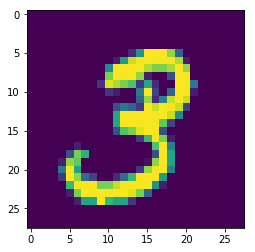

In [27]:
plt.imshow(mnist.train.images[1].reshape(28, 28))

In [28]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [29]:
W = tf.Variable(tf.zeros([784, 10]))

In [30]:
b = tf.Variable(tf.zeros([10]))

In [31]:
x.shape

TensorShape([Dimension(None), Dimension(784)])

In [32]:
W.shape

TensorShape([Dimension(784), Dimension(10)])

In [33]:
b.shape

TensorShape([Dimension(10)])

In [34]:
y = tf.matmul(x, W) + b

In [35]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [36]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

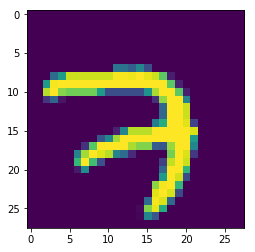

In [37]:
plt.imshow(mnist.train.images[0].reshape(28, 28))

In [38]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [39]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [40]:
train = optimizer.minimize(cross_entropy)

In [41]:
init = tf.global_variables_initializer()

In [42]:
sess = tf.Session()


In [43]:
sess.run(init)

In [44]:
for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
acc = tf.reduce_mean(tf.cast(matches, tf.float32))
print(sess.run(acc, feed_dict = {x: mnist.test.images, y_true: mnist.test.labels}))

0.9173


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal', 'target']

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df['target'] = df['target'].apply(int)

In [9]:
y=df['target']

In [10]:
X = df.drop('target', axis = 1)

In [13]:
type(y)
y


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [55]:
X


,sepal_length,sepal_width,petal_length,petal
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [58]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal'], dtype='object')

In [59]:
feat_cols = []
for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))
feat_cols


[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [60]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=15, shuffle=True)

tf36

    File
    Edit
    View
    Insert
    Cell
    Kernel
    Help

%config IPCompleter.greedy=True

import tensorflow as tf

import matplotlib.pyplot as plt

name = tf.constant("Sandeep Bhatia")

type(name)

tensorflow.python.framework.ops.Tensor

sess = tf.Session()

sess.run(name)

b'Sandeep Bhatia'

x = tf.placeholder(tf.int32)

x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

y = tf.placeholder(tf.int32)

add = tf.add(x, y)

sess.run(add, feed_dict = {x : 2, y: 3})

5

import numpy as np

a = np.array([[3.0, 3.0]])

b = np.array([[2.0], [2.0]])

a.shape

​

(1, 2)

b.shape

(2, 1)

mat1 = tf.constant(a)

mat2 = tf.constant(b)

matrixmulti = tf.matmul(mat1, mat2)

matrixmulti

<tf.Tensor 'MatMul:0' shape=(1, 1) dtype=float64>

sess.run(matrixmulti)

array([[12.]])

import os

os.getcwd()

'/home/sandeep'

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

WARNING:tensorflow:From <ipython-input-22-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
WARNING:tensorflow:From /home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
WARNING:tensorflow:From /home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
WARNING:tensorflow:From /home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
WARNING:tensorflow:From /home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
WARNING:tensorflow:From /home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

mnist.train.images.shape

​

​

(55000, 784)

import matplotlib.pyplot as plt

​

mnist.train.images[1].shape

(784,)

plt.imshow(mnist.train.images[1].reshape(28, 28))

<matplotlib.image.AxesImage at 0x7f0c3ac45198>

x = tf.placeholder(tf.float32, shape=[None, 784])

W = tf.Variable(tf.zeros([784, 10]))

b = tf.Variable(tf.zeros([10]))

x.shape

TensorShape([Dimension(None), Dimension(784)])

W.shape

TensorShape([Dimension(784), Dimension(10)])

b.shape

TensorShape([Dimension(10)])

y = tf.matmul(x, W) + b

y_true = tf.placeholder(tf.float32, shape=[None, 10])

mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

plt.imshow(mnist.train.images[0].reshape(28, 28))

<matplotlib.image.AxesImage at 0x7f0c38b77ef0>

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

train = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()

sess = tf.Session()

​

sess.run(init)

for step in range(1000):

    batch_x, batch_y = mnist.train.next_batch(100)

    sess.run(train, feed_dict={x: batch_x, y_true: batch_y})

matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))

acc = tf.reduce_mean(tf.cast(matches, tf.float32))

print(sess.run(acc, feed_dict = {x: mnist.test.images, y_true: mnist.test.labels}))

0.9173

import pandas as pd

df = pd.read_csv('iris.csv')

df.head()

	sepal length (cm) 	sepal width (cm) 	petal length (cm) 	petal width (cm) 	target
0 	5.1 	3.5 	1.4 	0.2 	0.0
1 	4.9 	3.0 	1.4 	0.2 	0.0
2 	4.7 	3.2 	1.3 	0.2 	0.0
3 	4.6 	3.1 	1.5 	0.2 	0.0
4 	5.0 	3.6 	1.4 	0.2 	0.0

df.columns

​

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal', 'target']

df.head()

	sepal_length 	sepal_width 	petal_length 	petal 	target
0 	5.1 	3.5 	1.4 	0.2 	0.0
1 	4.9 	3.0 	1.4 	0.2 	0.0
2 	4.7 	3.2 	1.3 	0.2 	0.0
3 	4.6 	3.1 	1.5 	0.2 	0.0
4 	5.0 	3.6 	1.4 	0.2 	0.0

df['target'] = df['target'].apply(int)

y=df['target']

X = df.drop('target', axis = 1)

type(y)

y

​

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

X

​

	sepal_length 	sepal_width 	petal_length 	petal
0 	5.1 	3.5 	1.4 	0.2
1 	4.9 	3.0 	1.4 	0.2
2 	4.7 	3.2 	1.3 	0.2
3 	4.6 	3.1 	1.5 	0.2
4 	5.0 	3.6 	1.4 	0.2
5 	5.4 	3.9 	1.7 	0.4
6 	4.6 	3.4 	1.4 	0.3
7 	5.0 	3.4 	1.5 	0.2
8 	4.4 	2.9 	1.4 	0.2
9 	4.9 	3.1 	1.5 	0.1
10 	5.4 	3.7 	1.5 	0.2
11 	4.8 	3.4 	1.6 	0.2
12 	4.8 	3.0 	1.4 	0.1
13 	4.3 	3.0 	1.1 	0.1
14 	5.8 	4.0 	1.2 	0.2
15 	5.7 	4.4 	1.5 	0.4
16 	5.4 	3.9 	1.3 	0.4
17 	5.1 	3.5 	1.4 	0.3
18 	5.7 	3.8 	1.7 	0.3
19 	5.1 	3.8 	1.5 	0.3
20 	5.4 	3.4 	1.7 	0.2
21 	5.1 	3.7 	1.5 	0.4
22 	4.6 	3.6 	1.0 	0.2
23 	5.1 	3.3 	1.7 	0.5
24 	4.8 	3.4 	1.9 	0.2
25 	5.0 	3.0 	1.6 	0.2
26 	5.0 	3.4 	1.6 	0.4
27 	5.2 	3.5 	1.5 	0.2
28 	5.2 	3.4 	1.4 	0.2
29 	4.7 	3.2 	1.6 	0.2
... 	... 	... 	... 	...
120 	6.9 	3.2 	5.7 	2.3
121 	5.6 	2.8 	4.9 	2.0
122 	7.7 	2.8 	6.7 	2.0
123 	6.3 	2.7 	4.9 	1.8
124 	6.7 	3.3 	5.7 	2.1
125 	7.2 	3.2 	6.0 	1.8
126 	6.2 	2.8 	4.8 	1.8
127 	6.1 	3.0 	4.9 	1.8
128 	6.4 	2.8 	5.6 	2.1
129 	7.2 	3.0 	5.8 	1.6
130 	7.4 	2.8 	6.1 	1.9
131 	7.9 	3.8 	6.4 	2.0
132 	6.4 	2.8 	5.6 	2.2
133 	6.3 	2.8 	5.1 	1.5
134 	6.1 	2.6 	5.6 	1.4
135 	7.7 	3.0 	6.1 	2.3
136 	6.3 	3.4 	5.6 	2.4
137 	6.4 	3.1 	5.5 	1.8
138 	6.0 	3.0 	4.8 	1.8
139 	6.9 	3.1 	5.4 	2.1
140 	6.7 	3.1 	5.6 	2.4
141 	6.9 	3.1 	5.1 	2.3
142 	5.8 	2.7 	5.1 	1.9
143 	6.8 	3.2 	5.9 	2.3
144 	6.7 	3.3 	5.7 	2.5
145 	6.7 	3.0 	5.2 	2.3
146 	6.3 	2.5 	5.0 	1.9
147 	6.5 	3.0 	5.2 	2.0
148 	6.2 	3.4 	5.4 	2.3
149 	5.9 	3.0 	5.1 	1.8

150 rows × 4 columns

from sklearn.model_selection import train_test_split

 X_train, X_test, y_train, y_test = train_test_split(

...     X, y, test_size=0.3, random_state=42)

X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal'], dtype='object')

feat_cols = []

for col in X.columns:

    feat_cols.append(tf.feature_column.numeric_column(col))

feat_cols

​

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]



In [61]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,10, 10], n_classes = 3, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqi6iruri', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0c38796240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [62]:
classifier.train(input_fn = input_func, steps=50)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpqi6iruri/model.ckpt.
INFO:tensorflow:loss = 10.628723, step = 1
INFO:tensorflow:Saving checkpoints for 50 into /tmp/tmpqi6iruri/model.ckpt.
INFO:tensorflow:Loss for final step: 7.0042353.


In [63]:
pred_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test), shuffle=False)

In [64]:
#its a generator so the list cast is needed
predictions = list(classifier.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqi6iruri/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [65]:
predictions

[{'logits': array([-3.130398 ,  1.0621188,  1.249537 ], dtype=float32),
  'probabilities': array([0.0068017 , 0.450199  , 0.54299927], dtype=float32),
  'class_ids': array([2]),
  'classes': array([b'2'], dtype=object)},
 {'logits': array([ 0.44208655, -0.06999784, -0.28098488], dtype=float32),
  'probabilities': array([0.47973025, 0.28747606, 0.23279366], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-6.0214553,  1.6704218,  2.2886817], dtype=float32),
  'probabilities': array([1.5983758e-04, 3.5012132e-01, 6.4971882e-01], dtype=float32),
  'class_ids': array([2]),
  'classes': array([b'2'], dtype=object)},
 {'logits': array([-2.8357673 ,  0.98644763,  1.1343176 ], dtype=float32),
  'probabilities': array([0.01003066, 0.45845452, 0.5315148 ], dtype=float32),
  'class_ids': array([2]),
  'classes': array([b'2'], dtype=object)},
 {'logits': array([-3.223347 ,  1.1829224,  1.3432034], dtype=float32),
  'probabilities': array([0.0

In [66]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [67]:
final_preds

[2,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0]

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(confusion_matrix(y_test, final_preds))

[[19  0  0]
 [ 0  1 12]
 [ 0  0 13]]


In [70]:
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.08      0.14        13
           2       0.52      1.00      0.68        13

   micro avg       0.73      0.73      0.73        45
   macro avg       0.84      0.69      0.61        45
weighted avg       0.86      0.73      0.66        45

